In [1]:
library(tidyverse)
library(dplyr)

install.packages("showtext")
install.packages("extrafont")
library(extrafont)
font_import()


theme_rangeframe <- function(size = 0.3) {
    theme(
        axis.line = element_line(colour = "black", lineend = "round", size = size),
        axis.ticks = element_line(linewidth = size),
        panel.border = element_blank()
    )
}

scale_axis_rangeframe <- function() {
    guides(x = "axis_truncated", y = "axis_truncated")
}

rotate_x_text <- function(angle=45) {
    theme(
        axis.text.x = element_text(angle = angle, hjust = 1)
    )
}

article_text <- function() {
    theme(
        text = element_text(size = 5, family = "Helvetica"),
        title = element_text(size = 6),
        axis.text.x = element_text(size = 5),
        axis.text.y = element_text(size = 5)
    )
}

no_legend <- function() {
    theme(
        legend.position = "none"
    )
}

no_margin <- function() {
    theme(
        plot.margin = margin(0, 0, 0, 0, unit = "lines")
    )
}

no_label <- function() {
    theme(
        axis.title = element_blank()
    )
}

no_text <- function() {
    theme(
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()
    )
}

no_x_text <- function() {
    theme(
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank()
    )
}

no_y_text <- function() {
    theme(
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank()
    )
}


custom_theme <- function(size = 0.3){
    theme_minimal() +
    theme(
        text = element_text(family='Helvetica'),
        axis.line = element_line(colour = "black", lineend = "round", size = size),
        axis.ticks = element_line(linewidth = size),
        panel.border = element_blank()
    )

}
theme_set(custom_theme())

article_text <- function() {
    theme(
        text = element_text(size = 5, family = "Helvetica"),
        title = element_text(size = 6),
        axis.text.x = element_text(size = 5),
        axis.text.y = element_text(size = 5)
    )
}

Warning message:
“package ‘tidyverse’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
Warning message:
“package ‘lubridate’ was built under R version 4.2.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package 

Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n]  y


Scanning ttf files in /usr/share/fonts/ ...

Extracting .afm files from .ttf files...

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-Bold.ttf
 : DejaVuSans-Bold already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-BoldOblique.ttf
 : DejaVuSans-BoldOblique already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-ExtraLight.ttf
 : DejaVuSans-ExtraLight already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-Oblique.ttf
 : DejaVuSans-Oblique already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans.ttf
 : DejaVuSans already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSansCondensed-Bold.ttf
 : DejaVuSansCondensed-Bold already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSansCondensed-BoldOblique.ttf
 : DejaVuSansCondensed-BoldOblique already registered in fonts d

In [2]:
color_dict = c(
    "CellFlow"= "#B12F8C",
    "Mean model 1"= "#8F97A8",
    "Mean model 2"= "#566573",
    "Identity"="#BDBDBD")

In [3]:
output_dir <- "/lustre/groups/ml01/workspace/ot_perturbation/figures/pbmc_new_donor/benchmark"

In [4]:
df <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/pbmc/results/allocation/metrics_new_donor.csv")

New names:
• `` -> `...1`
Rows: 9456 Columns: 179
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (10): ...1, Unnamed: 0, predicted_deg_genes, wandb_name, cytokine_in_t...
dbl  (167): mean_decoded_r_sq_per_cell_type, mean_e_distance_per_cell_type, ...
lgl    (1): new_run
dttm   (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
df$method <- factor(df$method, 
                                levels = c("id", "m1", "m2", "cf"),
                                labels = c("Identity", "Mean model 1", "Mean model 2", "CellFlow"))  # Correct factorization
df$num_cytokines_in_train <- as.character(df$num_cytokines_in_train)

df$num_cytokines_in_train <- factor(df$num_cytokines_in_train, 
                                    levels = sort(as.numeric(unique(df$num_cytokines_in_train))))



Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


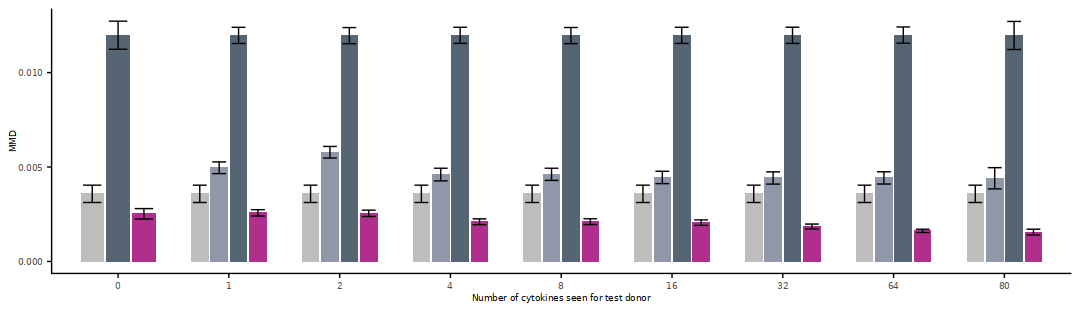

In [6]:
options(repr.plot.width = 9.0, repr.plot.height = 2.6, unit="cm")

df_summary <- df %>%
  group_by(num_cytokines_in_train, method) %>%
  summarise(
    mean_ood_mmd = mean(ood_mmd, na.rm = TRUE),
    se = sd(ood_mmd, na.rm = TRUE) / sqrt(n()),  # Standard error
    .groups = 'drop'
  )

p <- ggplot(df_summary, aes(x=num_cytokines_in_train, y=mean_ood_mmd, fill=method)) +
  geom_bar(
    stat="identity", 
    position=position_dodge(0.7), 
    width=0.6  # Bar width
  ) +
  geom_errorbar(
    aes(ymin = mean_ood_mmd - se, ymax = mean_ood_mmd + se),
    position=position_dodge(0.7),  # Align error bars with bars
    width=0.5,  # Width of error bar caps
    linewidth=0.3,
  ) +
  labs(
    x="Number of cytokines seen for test donor",
    y="MMD",
    fill="Method"
  ) +
#scale_y_log10() +
scale_fill_manual(values=color_dict) +
  scale_fill_manual(values=color_dict) +  # Replace with your actual color dictionary
  custom_theme() +
    article_text() +
    no_legend() +
  theme(
    axis.title.x = element_text(size=5),
    axis.title.y = element_text(size=5),
    axis.text.x = element_text(size=5),
    axis.text.y = element_text(size=5),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p


In [7]:
ggsave(file.path(output_dir, "MMD.pdf"), plot = p, device = "pdf",width = 8.0, height = 4.0, unit="cm")

In [8]:
df$sinkhorn_div <- df$ood_sdiv_10 + df$ood_sdiv_100
df$mean_sinkhorn_div_per_cell_type <- df$mean_sdiv_100_per_cell_type + df$mean_sdiv_100_per_cell_type

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


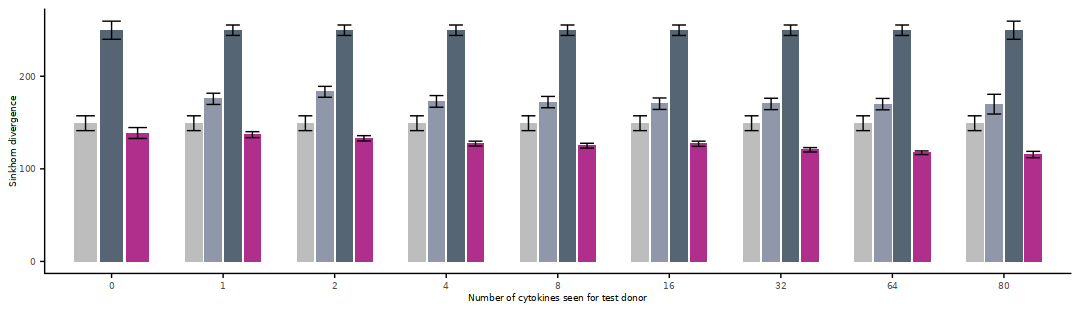

In [9]:
options(repr.plot.width = 9.0, repr.plot.height = 2.6, unit="cm")

df_summary <- df %>%
  group_by(num_cytokines_in_train, method) %>%
  summarise(
    mean_sinkhorn_div = mean(sinkhorn_div, na.rm = TRUE),
    se = sd(sinkhorn_div, na.rm = TRUE) / sqrt(n()),  # Standard error
    .groups = 'drop'
  )

p <- ggplot(df_summary, aes(x=num_cytokines_in_train, y=mean_sinkhorn_div, fill=method)) +
  geom_bar(
    stat="identity", 
    position=position_dodge(0.7), 
    width=0.6  # Bar width
  ) +
  geom_errorbar(
    aes(ymin = mean_sinkhorn_div - se, ymax = mean_sinkhorn_div + se),
    position=position_dodge(0.7),  # Align error bars with bars
    width=0.5,  # Width of error bar caps
    linewidth=0.3,
  ) +
  labs(
    x="Number of cytokines seen for test donor",
    y="Sinkhorn divergence",
    fill="Method"
  ) +
#scale_y_log10() +
scale_fill_manual(values=color_dict) +
  scale_fill_manual(values=color_dict) +  # Replace with your actual color dictionary
  custom_theme() +
    article_text() +
    no_legend() +
  theme(
    axis.title.x = element_text(size=5),
    axis.title.y = element_text(size=5),
    axis.text.x = element_text(size=5),
    axis.text.y = element_text(size=5),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p


In [10]:
ggsave(file.path(output_dir, "sinkhorn_div.pdf"), plot = p, device = "pdf",width = 8.0, height = 4.0, unit="cm")

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


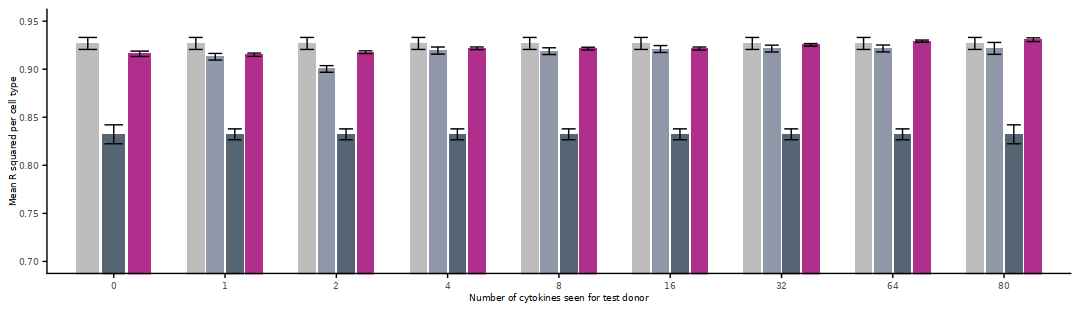

In [11]:
options(repr.plot.width = 9.0, repr.plot.height = 2.6, unit="cm")

df_summary <- df %>%
  group_by(num_cytokines_in_train, method) %>%
  summarise(
    mean_mean_decoded_r_sq_per_cell_type = mean(mean_decoded_r_sq_per_cell_type, na.rm = TRUE),
    se = sd(mean_decoded_r_sq_per_cell_type, na.rm = TRUE) / sqrt(n()),  # Standard error
    .groups = 'drop'
  )

p <- ggplot(df_summary, aes(x=num_cytokines_in_train, y=mean_mean_decoded_r_sq_per_cell_type, fill=method)) +
  geom_bar(
    stat="identity", 
    position=position_dodge(0.7), 
    width=0.6  # Bar width
  ) +
  geom_errorbar(
    aes(ymin = mean_mean_decoded_r_sq_per_cell_type - se, ymax = mean_mean_decoded_r_sq_per_cell_type + se),
    position=position_dodge(0.7),  # Align error bars with bars
    width=0.5,  # Width of error bar caps
    linewidth=0.3,
  ) +
  labs(
    x="Number of cytokines seen for test donor",
    y="Mean R squared per cell type",
    fill="Method"
  ) +
#scale_y_log10() +
scale_fill_manual(values=color_dict) +
  scale_fill_manual(values=color_dict) +  # Replace with your actual color dictionary
  custom_theme() +
    article_text() +
    no_legend() +
  theme(
    axis.title.x = element_text(size=5),
    axis.title.y = element_text(size=5),
    axis.text.x = element_text(size=5),
    axis.text.y = element_text(size=5),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  ) +
  coord_cartesian(ylim = c(0.70, 0.95)) 
p


In [12]:
ggsave(file.path(output_dir, "mean_r_squared_per_cell_type.pdf"), plot = p, device = "pdf",width = 8.0, height = 4.0, unit="cm")


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


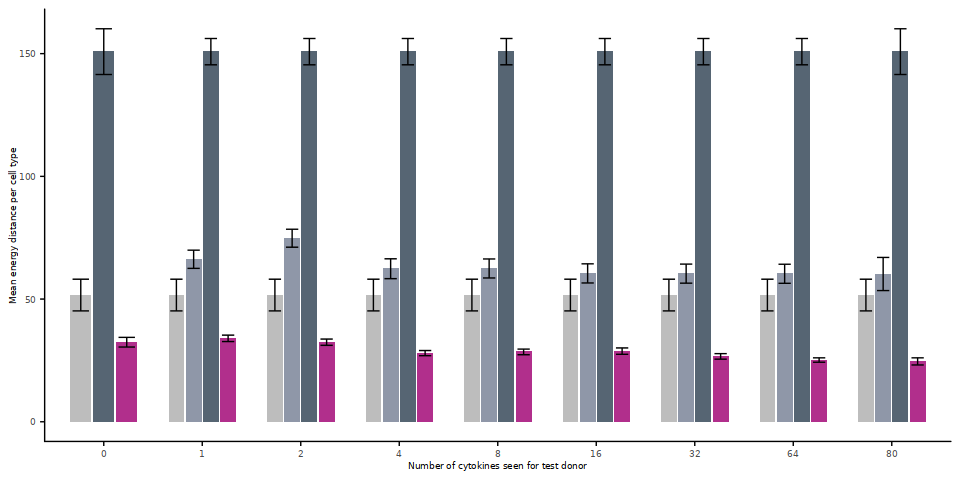

In [13]:
options(repr.plot.width = 8.0, repr.plot.height = 4.0, unit="cm")

df_summary <- df %>%
  group_by(num_cytokines_in_train, method) %>%
  summarise(
    mean_mean_e_distance_per_cell_type = mean(mean_e_distance_per_cell_type, na.rm = TRUE),
    se = sd(mean_e_distance_per_cell_type, na.rm = TRUE) / sqrt(n()),  # Standard error
    .groups = 'drop'
  )

p <- ggplot(df_summary, aes(x=num_cytokines_in_train, y=mean_mean_e_distance_per_cell_type, fill=method)) +
  geom_bar(
    stat="identity", 
    position=position_dodge(0.7), 
    width=0.6  # Bar width
  ) +
  geom_errorbar(
    aes(ymin = mean_mean_e_distance_per_cell_type - se, ymax = mean_mean_e_distance_per_cell_type + se),
    position=position_dodge(0.7),  # Align error bars with bars
    width=0.5,  # Width of error bar caps
    linewidth=0.3,
  ) +
  labs(
    x="Number of cytokines seen for test donor",
    y="Mean energy distance per cell type",
    fill="Method"
  ) +
#scale_y_log10() +
scale_fill_manual(values=color_dict) +
  scale_fill_manual(values=color_dict) +  # Replace with your actual color dictionary
  custom_theme() +
    article_text() +
    no_legend() +
  theme(
    axis.title.x = element_text(size=5),
    axis.title.y = element_text(size=5),
    axis.text.x = element_text(size=5),
    axis.text.y = element_text(size=5),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  ) #+
  #coord_cartesian(ylim = c(0.70, 0.95)) 
p


In [14]:
ggsave(file.path(output_dir, "mean_e_distance_per_cell_type.pdf"), plot = p, device = "pdf",width = 8.0, height = 4.0, unit="cm")


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


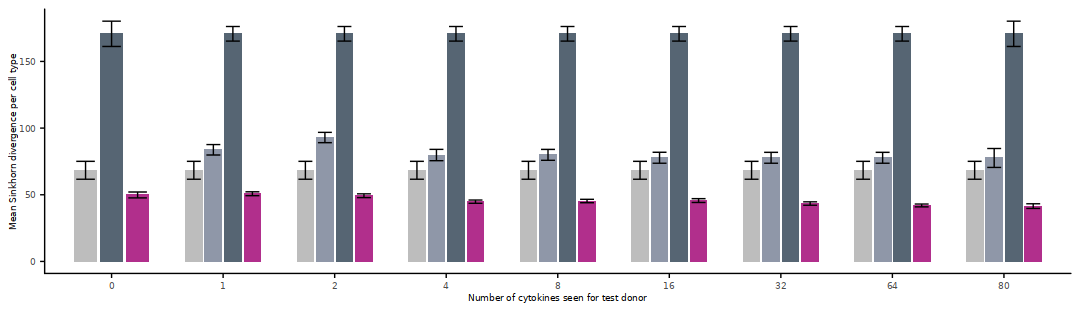

In [15]:
options(repr.plot.width = 9.0, repr.plot.height = 2.6, unit="cm")

df_summary <- df %>%
  group_by(num_cytokines_in_train, method) %>%
  summarise(
    mean_mean_sinkhorn_div_per_cell_type = mean(mean_sinkhorn_div_per_cell_type, na.rm = TRUE),
    se = sd(mean_sinkhorn_div_per_cell_type, na.rm = TRUE) / sqrt(n()),  # Standard error
    .groups = 'drop'
  )

p <- ggplot(df_summary, aes(x=num_cytokines_in_train, y=mean_mean_sinkhorn_div_per_cell_type, fill=method)) +
  geom_bar(
    stat="identity", 
    position=position_dodge(0.7), 
    width=0.6  # Bar width
  ) +
  geom_errorbar(
    aes(ymin = mean_mean_sinkhorn_div_per_cell_type - se, ymax = mean_mean_sinkhorn_div_per_cell_type + se),
    position=position_dodge(0.7),  # Align error bars with bars
    width=0.5,  # Width of error bar caps
    linewidth=0.3,
  ) +
  labs(
    x="Number of cytokines seen for test donor",
    y="Mean Sinkhorn divergence per cell type",
    fill="Method"
  ) +
#scale_y_log10() +
scale_fill_manual(values=color_dict) +
  scale_fill_manual(values=color_dict) +  # Replace with your actual color dictionary
  custom_theme() +
    article_text() +
    no_legend() +
  theme(
    axis.title.x = element_text(size=5),
    axis.title.y = element_text(size=5),
    axis.text.x = element_text(size=5),
    axis.text.y = element_text(size=5),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  ) #+
  #coord_cartesian(ylim = c(0.70, 0.95)) 
p


In [16]:
ggsave(file.path(output_dir, "mean_sinkhorn_div_per_cell_type.pdf"), plot = p, device = "pdf",width = 8.0, height = 4.0, unit="cm")


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


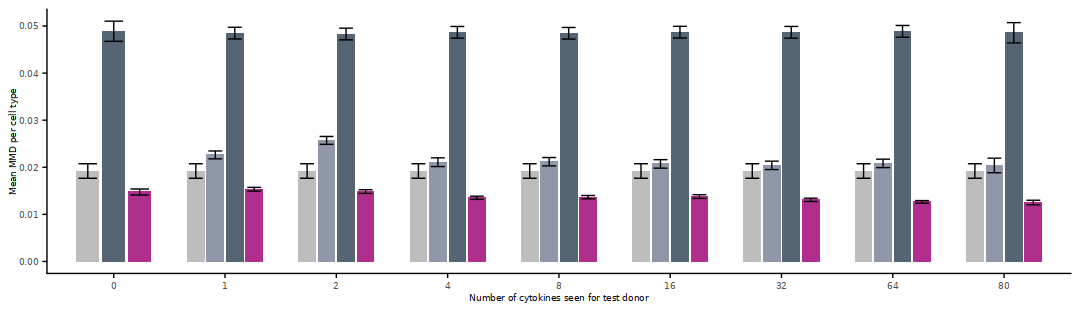

In [17]:
options(repr.plot.width = 9.0, repr.plot.height = 2.6, unit="cm")

df_summary <- df %>%
  group_by(num_cytokines_in_train, method) %>%
  summarise(
    mean_mean_mmd_per_cell_type = mean(mean_mmd_per_cell_type, na.rm = TRUE),
    se = sd(mean_mmd_per_cell_type, na.rm = TRUE) / sqrt(n()),  # Standard error
    .groups = 'drop'
  )

p <- ggplot(df_summary, aes(x=num_cytokines_in_train, y=mean_mean_mmd_per_cell_type, fill=method)) +
  geom_bar(
    stat="identity", 
    position=position_dodge(0.7), 
    width=0.6  # Bar width
  ) +
  geom_errorbar(
    aes(ymin = mean_mean_mmd_per_cell_type - se, ymax = mean_mean_mmd_per_cell_type + se),
    position=position_dodge(0.7),  # Align error bars with bars
    width=0.5,  # Width of error bar caps
    linewidth=0.3,
  ) +
  labs(
    x="Number of cytokines seen for test donor",
    y="Mean MMD per cell type",
    fill="Method"
  ) +
#scale_y_log10() +
scale_fill_manual(values=color_dict) +
  scale_fill_manual(values=color_dict) +  # Replace with your actual color dictionary
  custom_theme() +
    article_text() +
    no_legend() +
  theme(
    axis.title.x = element_text(size=5),
    axis.title.y = element_text(size=5),
    axis.text.x = element_text(size=5),
    axis.text.y = element_text(size=5),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  ) #+
  #coord_cartesian(ylim = c(0.70, 0.95)) 
p


In [18]:
ggsave(file.path(output_dir, "mean_mmd_per_cell_type.pdf"), plot = p, device = "pdf",width = 8.0, height = 4.0, unit="cm")


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


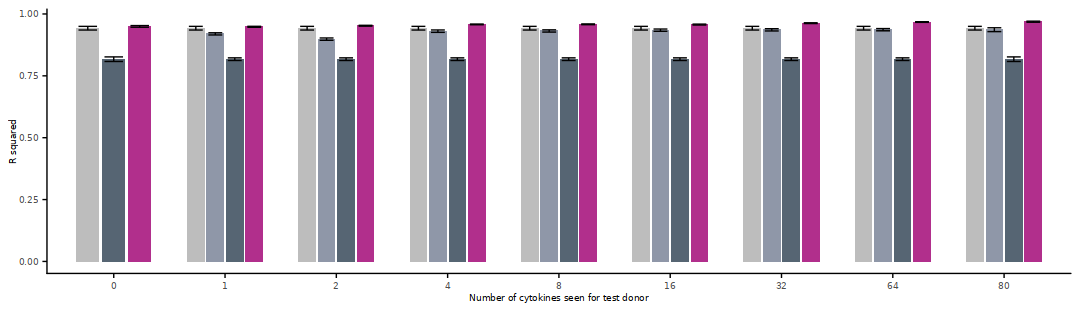

In [19]:
options(repr.plot.width = 9.0, repr.plot.height = 2.6, unit="cm")

df_summary <- df %>%
  group_by(num_cytokines_in_train, method) %>%
  summarise(
    mean_decoded_ood_r_squared = mean(decoded_ood_r_squared, na.rm = TRUE),
    se = sd(decoded_ood_r_squared, na.rm = TRUE) / sqrt(n()),  # Standard error
    .groups = 'drop'
  )

p <- ggplot(df_summary, aes(x=num_cytokines_in_train, y=mean_decoded_ood_r_squared, fill=method)) +
  geom_bar(
    stat="identity", 
    position=position_dodge(0.7), 
    width=0.6  # Bar width
  ) +
  geom_errorbar(
    aes(ymin = mean_decoded_ood_r_squared - se, ymax = mean_decoded_ood_r_squared + se),
    position=position_dodge(0.7),  # Align error bars with bars
    width=0.5,  # Width of error bar caps
    linewidth=0.3,
  ) +
  labs(
    x="Number of cytokines seen for test donor",
    y="R squared",
    fill="Method"
  ) +
#scale_y_log10() +
scale_fill_manual(values=color_dict) +
  scale_fill_manual(values=color_dict) +  # Replace with your actual color dictionary
  custom_theme() +
    article_text() +
    no_legend() +
  theme(
    axis.title.x = element_text(size=5),
    axis.title.y = element_text(size=5),
    axis.text.x = element_text(size=5),
    axis.text.y = element_text(size=5),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  ) #+
  #coord_cartesian(ylim = c(0.70, 0.95)) 
p


In [20]:
ggsave(file.path(output_dir, "r_squared.pdf"), plot = p, device = "pdf",width = 8.0, height = 4.0, unit="cm")
